In [268]:
![](../images/logos.jpg "MiCMOR, KIT Campus Alpin")

**[MiCMOR](https://micmor.kit.edu) [SummerSchool "Environmental Data Science: From Data Exploration to Deep Learning"](https://micmor.kit.edu/sites/default/files/MICMoR%20Summer%20School%202019%20Flyer.pdf)**  
Student groupwork, Sept. 10. 2019, Member1, Mmb2, Mmb3,Mmb4.

---

SyntaxError: invalid syntax (<ipython-input-268-cce55890e1f2>, line 3)

In [169]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [208]:
import xarray as xr 
import numpy as np
import regionmask
import geopandas as gpd
from shapely.geometry import Polygon
import pandas as pd
from shapely import geometry
import matplotlib.pyplot as plt
import geoviews as gv  
import seaborn as sns

In [173]:
data = pd.read_csv('../StudentGroupWork/combined_data_7_sept.csv') 
data.head()

,L.x,F.x,R.x,N.x,T.x,country,ID_fine,ID,plot.x,div.x,...,mean_temp,mean_summer_temp,mean_winter_temp,mean_precip,n,p,N.P,species_name,grp_tree_species,ID_siteplot
0,1.628284,5.085377,3.752627,3.684764,4.078809,Austria,1995_14_9_1,1995_14_9,1,1.782162,...,7.8,16.8,-1.5,745.0,13.86,1.00,13.860000,Fagus sylvatica,broadleaves,14_9_1
1,0.940092,4.997235,2.014747,1.856221,4.808295,Austria,1995_14_9_2,1995_14_9,2,1.083108,...,7.8,16.8,-1.5,745.0,13.86,1.00,13.860000,NaN,broadleaves,14_9_2
2,1.162765,5.083288,2.768645,2.775177,4.072401,Austria,1995_14_9_3,1995_14_9,3,1.499527,...,7.8,16.8,-1.5,745.0,13.86,1.00,13.860000,Fagus sylvatica,broadleaves,14_9_3
3,0.686464,5.011050,1.860497,1.607735,4.837017,Austria,1995_14_9_4,1995_14_9,4,0.894223,...,7.8,16.8,-1.5,745.0,13.86,1.00,13.860000,NaN,broadleaves,14_9_4
4,5.058824,2.411765,2.470588,3.941176,1.176471,Czech Republic,1995_58_2029_1,1995_58_2029,1,1.886485,...,7.9,16.8,-1.8,598.0,14.28,1.65,8.654545,Picea abies,conifers,58_2029_1


In [175]:
data.shape

(12079, 36)

In [176]:
for col in data.columns:
    print(col)

L.x
F.x
R.x
N.x
T.x
country
ID_fine
ID
plot.x
div.x
rich.x
L.y
F.y
R.y
N.y
T.y
div.y
rich.y
n_nh4
n_no3
ID_site
latitude
longitude
survey_year
code_country
sum_canopy
mean_temp
mean_summer_temp
mean_winter_temp
mean_precip
n
p
N.P
species_name
grp_tree_species
ID_siteplot


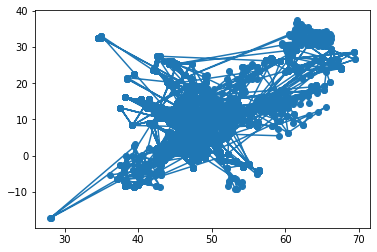

In [178]:
lat=data.latitude
lon=data.longitude
plt.plot(lat,lon, marker='o');

In [179]:
data_gb = data.groupby('country')
#for gb in data_gb:
#    print(gb)

In [180]:
# creating a geometry column 
gm =  [geometry.Point(xy) for xy in zip(data['longitude'], data['latitude'])]
# Coordinate reference system : WGS84
crs = {'init': 'epsg:4326'}
# Creating a Geographic data frame 
data_gpd = gpd.GeoDataFrame(data, crs=crs, geometry=gm)
data_gpd.head()

,L.x,F.x,R.x,N.x,T.x,country,ID_fine,ID,plot.x,div.x,...,mean_summer_temp,mean_winter_temp,mean_precip,n,p,N.P,species_name,grp_tree_species,ID_siteplot,geometry
0,1.628284,5.085377,3.752627,3.684764,4.078809,Austria,1995_14_9_1,1995_14_9,1,1.782162,...,16.8,-1.5,745.0,13.86,1.00,13.860000,Fagus sylvatica,broadleaves,14_9_1,POINT (16.0252 48.0716)
1,0.940092,4.997235,2.014747,1.856221,4.808295,Austria,1995_14_9_2,1995_14_9,2,1.083108,...,16.8,-1.5,745.0,13.86,1.00,13.860000,NaN,broadleaves,14_9_2,POINT (16.0252 48.0716)
2,1.162765,5.083288,2.768645,2.775177,4.072401,Austria,1995_14_9_3,1995_14_9,3,1.499527,...,16.8,-1.5,745.0,13.86,1.00,13.860000,Fagus sylvatica,broadleaves,14_9_3,POINT (16.0252 48.0716)
3,0.686464,5.011050,1.860497,1.607735,4.837017,Austria,1995_14_9_4,1995_14_9,4,0.894223,...,16.8,-1.5,745.0,13.86,1.00,13.860000,NaN,broadleaves,14_9_4,POINT (16.0252 48.0716)
4,5.058824,2.411765,2.470588,3.941176,1.176471,Czech Republic,1995_58_2029_1,1995_58_2029,1,1.886485,...,16.8,-1.8,598.0,14.28,1.65,8.654545,Picea abies,conifers,58_2029_1,POINT (15.5723 50.3339)


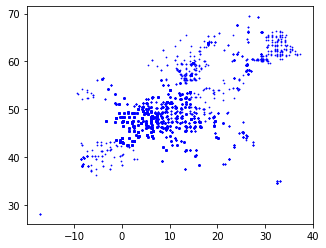

In [181]:
# Plot all points
data_gpd.plot(marker='o', color='b', markersize=0.5);

/opt/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:393: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "'color'.", UserWarning)


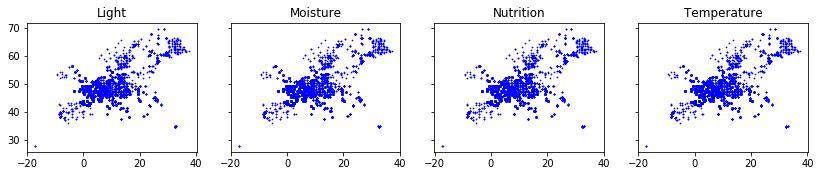

In [182]:
#data_gpd.plot(column = 'L.x', marker='o', color='b', markersize=0.5);
#Lx = data_gpd.plot.add_subplot(column = 'L.x')

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, sharex=True, sharey=True, figsize=(14,4))
data_gpd.plot(ax = ax1, column = 'L.x', marker='o', color='b', markersize=0.5)
ax1.set_title('Light')
data_gpd.plot(ax = ax2, column = 'F.x', marker='o', color='b', markersize=0.5)
ax2.set_title('Moisture')
data_gpd.plot(ax = ax3, column = 'N.x', marker='o', color='b', markersize=0.5)
ax3.set_title('Nutrition')
data_gpd.plot(ax = ax4, column = 'T.x', marker='o', color='b', markersize=0.5)
ax4.set_title('Temperature');

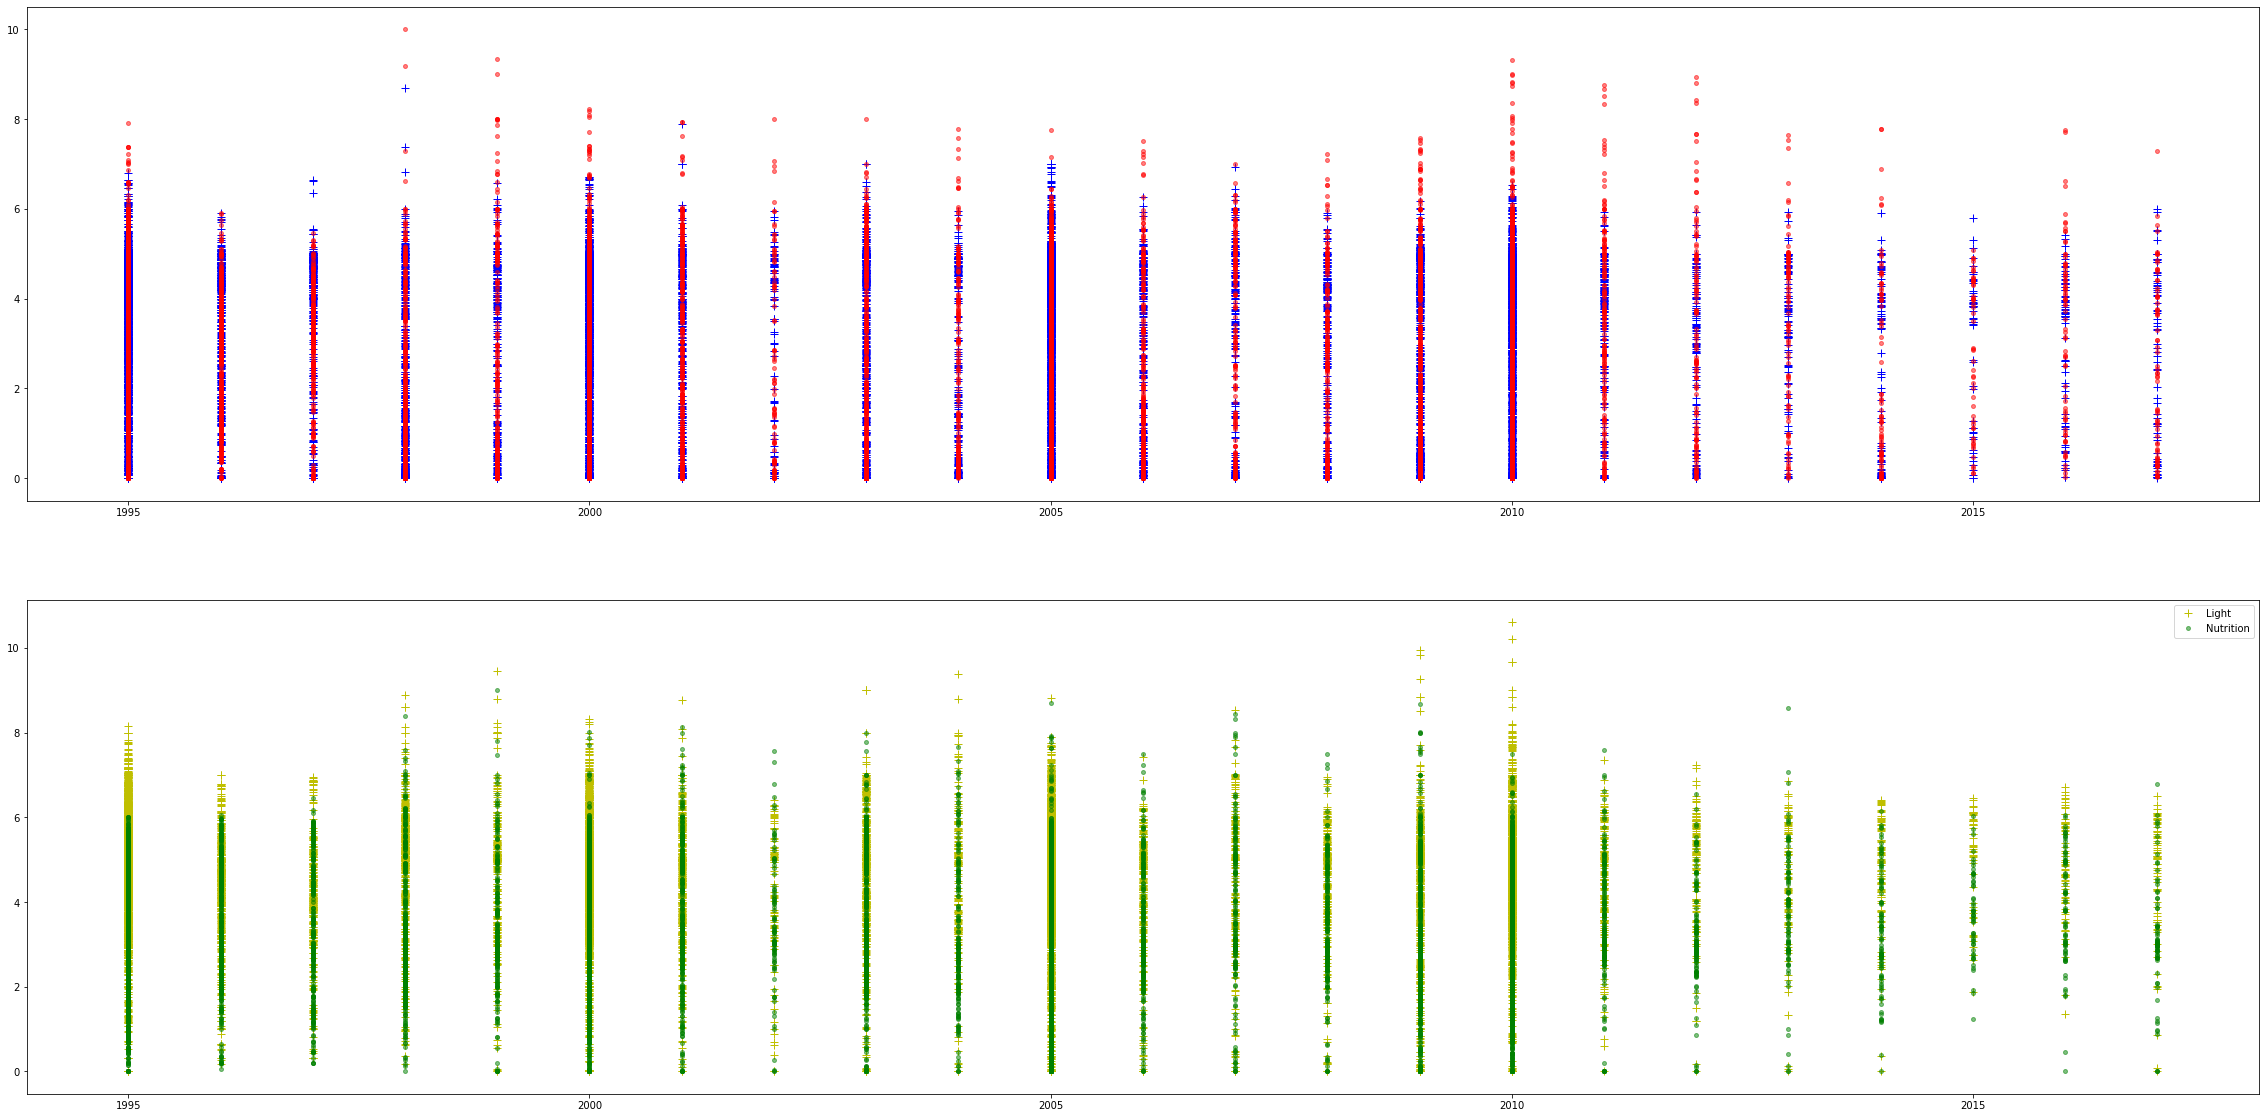

In [183]:
#fig2, (ax1, ax2) = plt.subplots(ncols=2)
#data.plot(ax=ax1, data['survey_year'], data['F.x'],'+', markersize=0.5, c='b', label='Moisture')
#data.plot(ax=ax1, data['survey_year'], data['T.x'],'o', markersize=0.5, c='g', label='Temperature')
#data.plot(ax=ax2, data['survey_year'], data['L.x'],'o', markersize=0.5, c='r', label='Light')
#data.plot(ax=ax2, data['survey_year'], data['N.x'],'o', markersize=0.5, c='y', label='Nutrition')
#plt.legend(loc='best');

plt.figure(figsize=(40,20))
plt.subplot(211)
plt.plot(data['survey_year'], data['F.x'], '+', markersize=8, c='b', label='Moisture')
plt.plot(data['survey_year'], data['T.x'], 'o', markersize=4, c='r', label='Temperature', alpha=0.5)
plt.subplot(212)
plt.plot(data['survey_year'], data['L.x'], '+', markersize=8, c='y', label='Light');
plt.plot(data['survey_year'], data['N.x'], 'o', markersize=4, c='g', label='Nutrition', alpha=0.5)
plt.legend(loc='best');

#plt.plot(data['survey_year'], data['F.x'],'+', markersize=0.5, c='b', label='Moisture')
#plt.plot(data['survey_year'], data['T.x'],'o', markersize=0.5, c='r', label='Temperature')
#plt.legend(loc='best');
#plt.plot(data['survey_year'], data['L.x'],'o', markersize=0.5, c='y', label='Light')
#plt.plot(data['survey_year'], data['N.x'],'o', markersize=0.5, c='g', label='Nutrition')


#L.x
#F.x
#R.x
#N.x
#T.x

#survey_year

In [186]:
#data.ndim
data.dtypes

L.x                 float64
F.x                 float64
R.x                 float64
N.x                 float64
T.x                 float64
country              object
ID_fine              object
ID                   object
plot.x               object
div.x               float64
rich.x              float64
L.y                 float64
F.y                 float64
R.y                 float64
N.y                 float64
T.y                 float64
div.y               float64
rich.y              float64
n_nh4               float64
n_no3               float64
ID_site              object
latitude            float64
longitude           float64
survey_year           int64
code_country        float64
sum_canopy          float64
mean_temp           float64
mean_summer_temp    float64
mean_winter_temp    float64
mean_precip         float64
n                   float64
p                   float64
N.P                 float64
species_name         object
grp_tree_species     object
ID_siteplot         

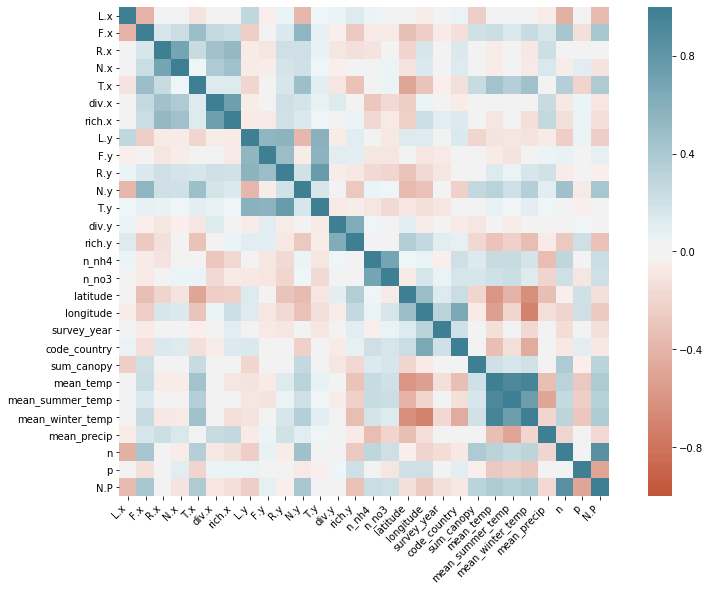

In [219]:
data_co = data.corr()
fig,ax=plt.subplots(1,1, figsize=(14,9))
ax_co = sns.heatmap(
    data_co, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    ax=ax
)
ax_co.set_xticklabels(
    ax_co.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [222]:

for co in data_co:
    data_co.max()
    co!=1
    print(co)

L.x
F.x
R.x
N.x
T.x
div.x
rich.x
L.y
F.y
R.y
N.y
T.y
div.y
rich.y
n_nh4
n_no3
latitude
longitude
survey_year
code_country
sum_canopy
mean_temp
mean_summer_temp
mean_winter_temp
mean_precip
n
p
N.P


In [253]:
data_co.head()
for i in range(len(data_co)):
    data_co.iloc[i,i]=np.nan

In [254]:
data_co[(data_co > -0.5) & (data_co < 0.5)]=np.nan
data_co

,L.x,F.x,R.x,N.x,T.x,div.x,rich.x,L.y,F.y,R.y,...,survey_year,code_country,sum_canopy,mean_temp,mean_summer_temp,mean_winter_temp,mean_precip,n,p,N.P
L.x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F.x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
R.x,NaN,NaN,NaN,0.692299,NaN,NaN,0.517883,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
N.x,NaN,NaN,0.692299,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
T.x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
div.x,NaN,NaN,NaN,NaN,NaN,NaN,0.731216,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rich.x,NaN,NaN,0.517883,NaN,NaN,0.731216,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
L.y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.543278,0.575976,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F.y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.543278,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
R.y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.575976,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [230]:
#data_co.argmax()
#data_co.values.argmax()

0

In [243]:
data_co.iloc[:,11:28]

,T.y,div.y,rich.y,n_nh4,n_no3,latitude,longitude,survey_year,code_country,sum_canopy,mean_temp,mean_summer_temp,mean_winter_temp,mean_precip,n,p,N.P
L.x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F.x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
R.x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
N.x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
T.x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
div.x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rich.x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
L.y,0.584439,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F.y,0.575759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
R.y,0.752958,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [267]:
#Ranking of correlation
cols = data.columns
corr_list = []
threshold = 0.6
for i in range(0, data_co.shape[0]):
    for j in range(i+1,28):
        if (data_co.iloc[i,j] >= threshold or data_co.iloc[i,j] <= -threshold):
            corr_list.append([data_co.iloc[i,j],i,j])

data_coR = sorted(corr_list, key=lambda x:-abs(x[0]))

for v,i,j in data_coR:
    print("%s and %s = %.2f" % (cols[i], cols[j], v))


latitude and survey_year = 0.95
latitude and longitude = 0.91
sum_canopy and mean_summer_temp = 0.85
div.x and L.y = 0.75
longitude and survey_year = 0.75
country and ID_fine = 0.73
rich.y and survey_year = -0.72
N.y and T.y = 0.69
R.x and N.x = 0.69
rich.y and n_no3 = 0.65
div.y and survey_year = -0.65
F.y and R.y = 0.63


In [280]:
data_coR

[[0.9524707433060844, 21, 23],
 [0.909267346310767, 21, 22],
 [0.8481560414821099, 25, 27],
 [0.7529582660221772, 9, 11],
 [0.7457067894360809, 22, 23],
 [0.7312160478248901, 5, 6],
 [-0.71781875876675, 17, 23],
 [0.6949463375744148, 14, 15],
 [0.6922991125082805, 2, 3],
 [0.6538295057291984, 17, 19],
 [-0.6453946321021179, 16, 23],
 [0.6322702029621974, 12, 13]]

In [270]:
#print(corr_list)
#range(0, data_co.shape[0])
#data_coR

In [278]:
print(type(data_coR))

<class 'list'>


In [289]:
len(data_coR)

12

In [292]:
data_coRi = [data_coR[i-1] for i in [3,4,6,7,9,10,12,8,11]]
data_coRi

[[0.8481560414821099, 25, 27],
 [0.7529582660221772, 9, 11],
 [0.7312160478248901, 5, 6],
 [-0.71781875876675, 17, 23],
 [0.6922991125082805, 2, 3],
 [0.6538295057291984, 17, 19],
 [0.6322702029621974, 12, 13],
 [0.6949463375744148, 14, 15],
 [-0.6453946321021179, 16, 23]]

In [ ]:
#pairs that may be interesting
sum_canopy and mean_summer_temp = 0.85
country and ID_fine = 0.73
rich.y and survey_year = -0.72
N.y and T.y = 0.69
R.x and N.x = 0.69
rich.y and n_no3 = 0.65
div.y and survey_year = -0.65
F.y and R.y = 0.63